# HUMAN NETWORK ANALYSIS

## Exercise 1

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

2023-02-11 23:12:10.647588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

NameError: name 'keras' is not defined

In [4]:
x_train.shape

(60000, 28, 28)

In [13]:
# Flatten the images
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [14]:
# MLP model definition
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [23]:
history = model.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 1s 2ms/step - loss: 1.9052 - accuracy: 0.5376 - val_loss: 1.5265 - val_accuracy: 0.6549
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 1.2295 - accuracy: 0.7146 - val_loss: 0.9576 - val_accuracy: 0.8008
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.8380 - accuracy: 0.7969 - val_loss: 0.6904 - val_accuracy: 0.8330
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.6475 - accuracy: 0.8335 - val_loss: 0.5579 - val_accuracy: 0.8572
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.5472 - accuracy: 0.8544 - val_loss: 0.4811 - val_accuracy: 0.8723
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.4885 - accuracy: 0.8679 - val_loss: 0.4386 - val_accuracy: 0.8809
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.8762 - val_loss: 0.4076 - val_accuracy: 0.8865
Epoch 

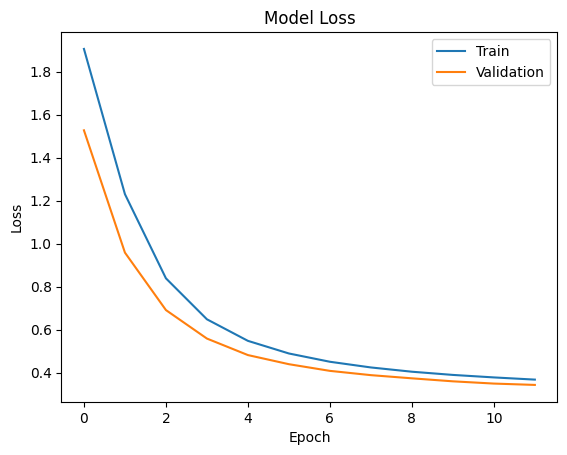

In [24]:
#Plot the training history loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

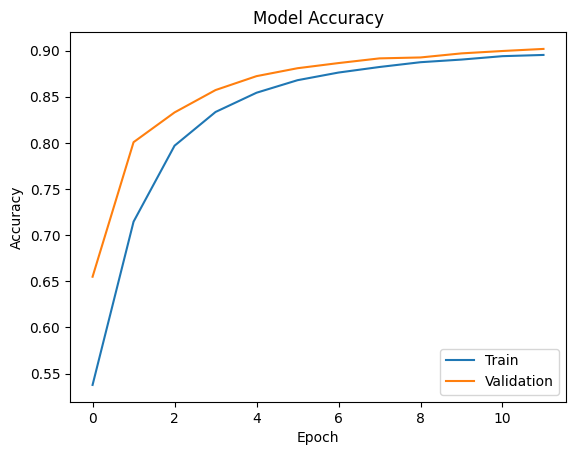

In [25]:
# Plot the training history accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### PREGUNTA 2

Describe how the accuracy and loss evaluated on the training and validation sets progress differently across epochs, and what this tells us about the generalisation of the model. (Question 2, 8 points)

In [27]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.347586452960968
Test accuracy: 0.8989999890327454


### PREGUNTA 3
Explain whether you think this accuracy is sufficient for some uses of automatic hand-written digit classification, and why

### PREGUNTA 4
Explain how linear activation of units limits the possible computations this model can perform

In [28]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(256, input_shape=(784,), activation='relu'))
model_2.add(keras.layers.Dense(10, activation='softmax'))

model_2.summary()

model_2.compile(loss='categorical_crossentropy', 
                optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [29]:
history_2 = model_2.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 1s 2ms/step - loss: 2.2768 - accuracy: 0.1541 - val_loss: 2.2234 - val_accuracy: 0.2449
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 2.0544 - accuracy: 0.4573 - val_loss: 1.8186 - val_accuracy: 0.5757
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 1.5658 - accuracy: 0.6037 - val_loss: 1.3137 - val_accuracy: 0.7000
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 1.1611 - accuracy: 0.7137 - val_loss: 0.9932 - val_accuracy: 0.7783
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.9158 - accuracy: 0.7736 - val_loss: 0.7982 - val_accuracy: 0.8122
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.7616 - accuracy: 0.8070 - val_loss: 0.6736 - val_accuracy: 0.8381
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.6593 - accuracy: 0.8285 - val_loss: 0.5891 - val_accuracy: 0.8472
Epoch 

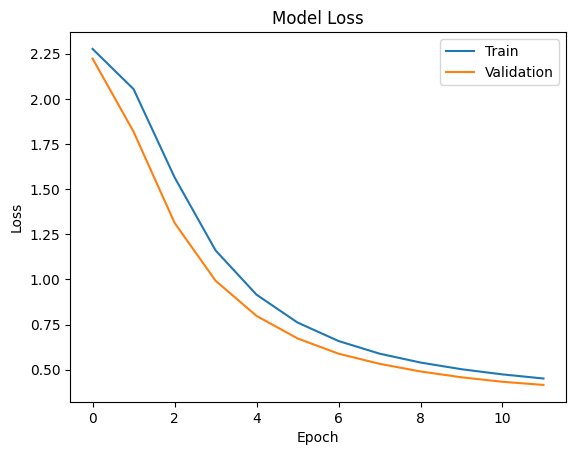

In [30]:
#Plot the training history loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

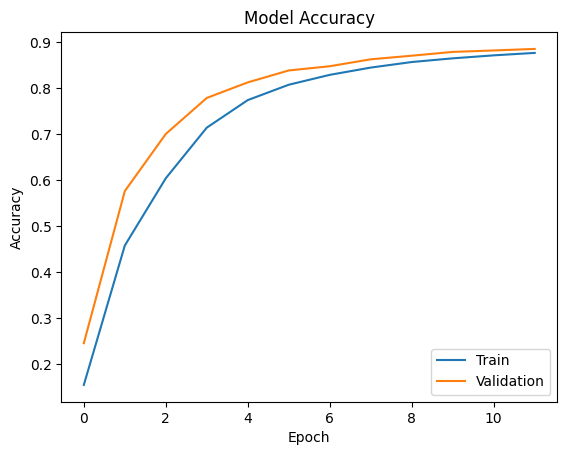

In [31]:
# Plot the training history accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### PREGUNTA 5
Describe how this training history differs from the previous model, for the training and validation sets. Explain what this tells us about the generalisation of the model

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [34]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train/255.0
x_test = x_test/255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [35]:
model_3 = keras.Sequential()
model_3.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_3.add(keras.layers.Flatten())
model_3.add(keras.layers.Dense(128, activation='relu'))
model_3.add(keras.layers.Dense(10, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adadelta(learning_rate=1), 
                metrics='accuracy')

In [36]:
history_3 = model_3.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 18s 46ms/step - loss: 0.2239 - accuracy: 0.9309 - val_loss: 0.0684 - val_accuracy: 0.9801
Epoch 2/6
375/375 [==============================] - 17s 47ms/step - loss: 0.0533 - accuracy: 0.9832 - val_loss: 0.0508 - val_accuracy: 0.9852
Epoch 3/6
375/375 [==============================] - 18s 47ms/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.0484 - val_accuracy: 0.9850
Epoch 4/6
375/375 [==============================] - 17s 46ms/step - loss: 0.0211 - accuracy: 0.9938 - val_loss: 0.0422 - val_accuracy: 0.9878
Epoch 5/6
375/375 [==============================] - 18s 47ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0442 - val_accuracy: 0.9874
Epoch 6/6
375/375 [==============================] - 17s 47ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0465 - val_accuracy: 0.9875


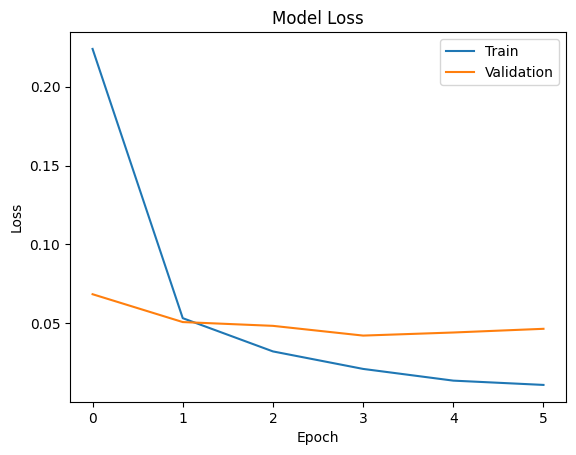

In [37]:
#Plot the training history loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

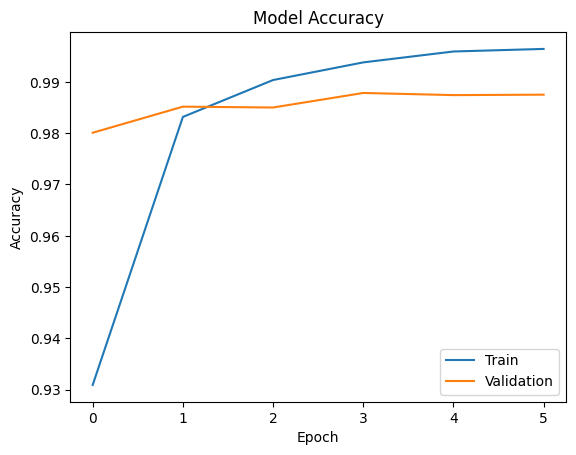

In [38]:
# Plot the training history accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [39]:
loss, accuracy = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.035973530262708664
Test accuracy: 0.9887999892234802


### PREGUNTA 6
Explain whether you think this is sufficient for the uses of automatic hand-written digit classification you listed in Question 1, and why.

### PREGUNTA 7
‘Dropout’ is a method used in deep network training to prevent overfitting of training data and focus on aspects of the learning model that will generalise to new data. Research and describe the principles of overfitting and how dropout can reduce this

In [40]:
model_4 = keras.Sequential()
model_4.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_4.add(keras.layers.Dropout(0.25))
model_4.add(keras.layers.Flatten())
model_4.add(keras.layers.Dense(128, activation='relu'))
model_4.add(keras.layers.Dropout(0.5))
model_4.add(keras.layers.Dense(10, activation='softmax'))

model_4.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adadelta(learning_rate=1), 
                metrics='accuracy')

In [41]:
history_4 = model_4.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 19s 50ms/step - loss: 0.3038 - accuracy: 0.9074 - val_loss: 0.0696 - val_accuracy: 0.9800
Epoch 2/6
375/375 [==============================] - 19s 51ms/step - loss: 0.0963 - accuracy: 0.9715 - val_loss: 0.0554 - val_accuracy: 0.9843
Epoch 3/6
375/375 [==============================] - 19s 50ms/step - loss: 0.0707 - accuracy: 0.9785 - val_loss: 0.0454 - val_accuracy: 0.9869
Epoch 4/6
375/375 [==============================] - 19s 51ms/step - loss: 0.0593 - accuracy: 0.9816 - val_loss: 0.0410 - val_accuracy: 0.9887
Epoch 5/6
375/375 [==============================] - 19s 51ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.0395 - val_accuracy: 0.9891
Epoch 6/6
375/375 [==============================] - 19s 50ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0402 - val_accuracy: 0.9892


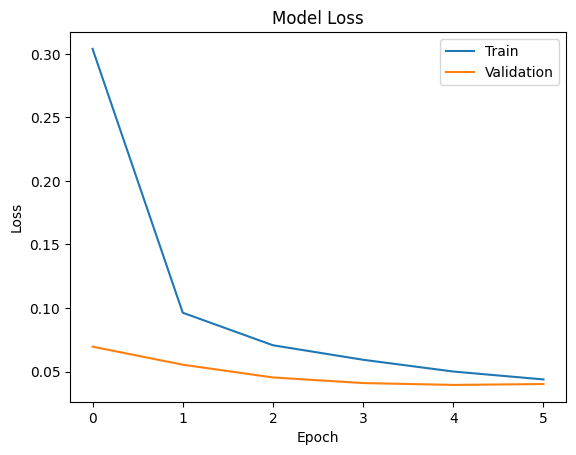

In [42]:
#Plot the training history loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

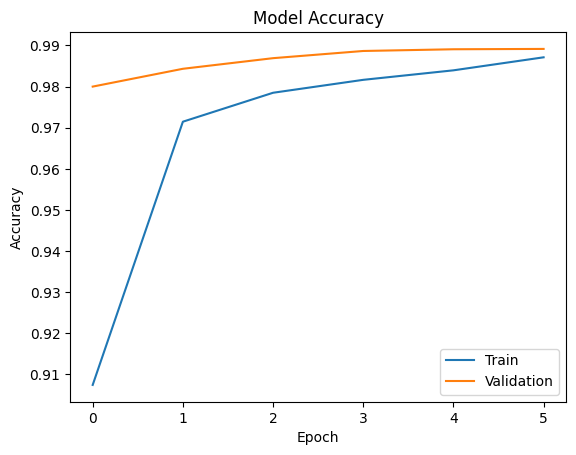

In [43]:
# Plot the training history accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [44]:
loss, accuracy = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.032550979405641556
Test accuracy: 0.989300012588501


### PREUNTA 8
In comparison to the previous (convolutional) model:

a) How does the time taken for each training epoch differ? (Google Colab may
not show this clearly, in which case run this on your own hardware)

b) How does the training history differ for both the training and validation sets?

c) How well does the resulting model generalise?

## Exercise 2

In [45]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 49s 0us/step


In [46]:
x_train = x_train/255.0
x_test = x_test/255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [48]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6), 
                metrics='accuracy')

In [51]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7901 - accuracy: 0.7305 - val_loss: 0.8326 - val_accuracy: 0.7158
Epoch 2/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7773 - accuracy: 0.7338 - val_loss: 0.8328 - val_accuracy: 0.7127
Epoch 3/20
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7750 - accuracy: 0.7336 - val_loss: 0.8223 - val_accuracy: 0.7226
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7732 - accuracy: 0.7372 - val_loss: 0.8495 - val_accuracy: 0.7121
Epoch 5/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7675 - accuracy: 0.7386 - val_loss: 0.8526 - val_accuracy: 0.7127
Epoch 6/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7648 - accuracy: 0.7383 - val_loss: 0.8943 - val_accuracy: 0.7087
Epoch 7/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7656 - accuracy: 0.7391 - val_loss: 0.8048 -

In [ ]:
#Plot the training history loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Plot the training history accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### PREUNTA 9
In comparison to the convolutional model for digit recognition:

a) How long does it take to run each training epoch? (This should be clear, even
in Google Colab)(1 point)

b) Give at least factors that may contribute to this difference, explaining each. (4
points)

c) Describehowthetraininghistorydiffersandwhy.(6points)

d) The simpler,non-convolutional models from Exercise 1 (Questions2-5) would
perform very poorly on this object recognition task, while they do fairly well on number recognition. What differences between these tasks could underlie this difference in performance? 

## Exercise 3